# Hierarchy Operations

### Required operations

- [x] Find sub-folders - Find all the solution articles in the subtree (across all descendents till leaf)
- [x] Find parent folders
- [ ] Find immediate parent
- [ ] Find immediate child
- [ ] Find the size of nested level (graph length/tree height) to limit the hierarchy
- [ ] Support infinite levels (practically applicable levels _say 100_)
- [ ] Add a folder at any hierarchy
- [ ] Remove a folder from any place at hierarchy
- [ ] Delete all the subfolders

## Folder Hierarchy of People Space

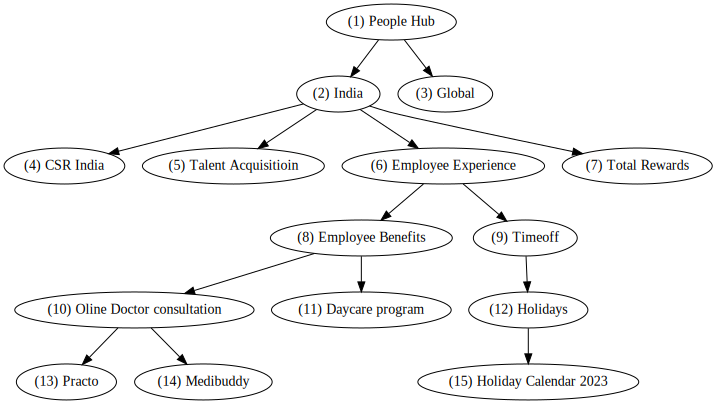

In [2]:
# import graph visualization
import graphviz

# define graph
folder_data = '''
digraph Folders {
    
    // Root folder 1 -

    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    

    //Color codes
    # ps [color = red, fillcolor=pink, style=filled]
    # ind [color = blue, fillcolor=skyblue, style=filled]
    # ee [color = green, fillcolor=lightgreen, style=filled]
    # eb [color = purple, fillcolor=violet, style=filled]
    # tof [color = orange, fillcolor=yellow, style=filled]
}
'''
folders = graphviz.Source(folder_data)
folders


## Find sub-folders

### Find sub-folders of `Employee Experience`

```sql
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.child_id WHERE h.parent_id = 6 ORDER BY length;
```

- Finds all the sub folders from the given folder (including the given one)
- Use case: Get all solution articles from subfolders including the current one.
  - This can be achieved by fetching all the folders with above query and the the solution article belongs to the folders.

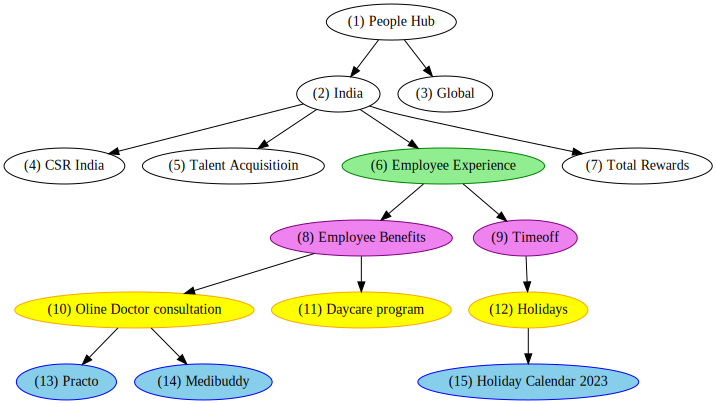

In [5]:
emp_exp = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    # ps [color = red, fillcolor=pink, style=filled]
    # ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
    eb [color = purple, fillcolor=violet, style=filled]
    tof [color = purple, fillcolor=violet, style=filled]
    odc [color = orange, fillcolor=yellow, style=filled]
    dp [color = orange, fillcolor=yellow, style=filled]
    hol [color = orange, fillcolor=yellow, style=filled]
    prc [color = blue, fillcolor=skyblue, style=filled]
    mb [color = blue, fillcolor=skyblue, style=filled]
    hc [color = blue, fillcolor=skyblue, style=filled]
}
'''
ee_sub = graphviz.Source(emp_exp)
ee_sub


### Result

| id | name | length |
| :--- | :--- | :--- |
| 6 | Employee Experience | 0 |
| 8 | Employee Benefits | 1 |
| 9 | Timeoff | 1 |
| 10 | Online Doctor Consultation | 2 |
| 11 | Daycare program | 2 |
| 12 | Holidays | 2 |
| 13 | Practo | 3 |
| 14 | Medibuddy | 3 |
| 15 | Holiday calendar 2023 | 3 |


## Find parent folders of `Employee Experience`


```sql
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = 6 ORDER BY length DESC;
```

- Finds all the parent folder from current level all the way up to the root folder
- Use case: 
  - Breadcrumbs
  - When agent opens the solution article by id, we should expand its foler upto the root level

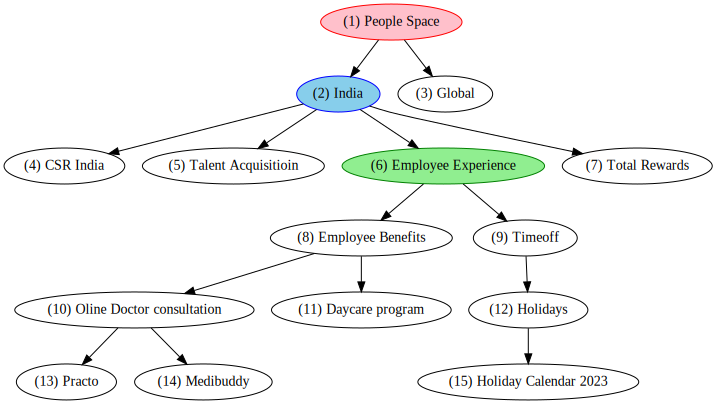

In [7]:
emp_exp1 = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    ps [color = red, fillcolor=pink, style=filled]
    ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
}
'''
ee_parent = graphviz.Source(emp_exp1)
ee_parent


### Result

| id | name | length |
| :--- | :--- | :--- |
| 1 | People Space | 2 |
| 2 | India | 1 |
| 6 | Employee Experience | 0 |
